In [1]:
import numpy as np 
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pathlib
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

## 1. Preprocessing

In [2]:
# Show the scope of our available data

main_dir = os.listdir('../input/brain-tumor-detection/no') + \
os.listdir('../input/brain-tumor-detection/yes')
len(main_dir)

3000

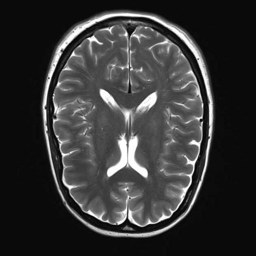

In [3]:
#Brain with no tumor example
image_no = Image.open('../input/brain-tumor-detection/no/No12.jpg').resize((256,256))
image_no

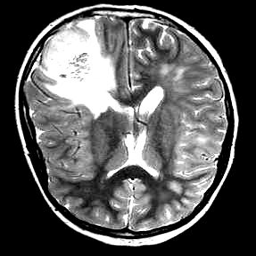

In [4]:
#Brain tumor example
image_yes = Image.open('../input/brain-tumor-detection/yes/y0.jpg').resize((256,256))
image_yes

In [5]:
yes_images = os.listdir('../input/brain-tumor-detection/yes')
no_images = os.listdir('../input/brain-tumor-detection/no')

data=[]
label=[]

# Read images in yes and no directory, pass to RGB, and append to data & label
for i, image_name in enumerate(yes_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread('../input/brain-tumor-detection/yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        data.append(np.array(image))
        label.append(1)
        
for i, image_name in enumerate(no_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread('../input/brain-tumor-detection/no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((128,128))
        data.append(np.array(image))
        label.append(0)
        
print(len(data))
print(len(label))

3000
3000


In [6]:
# Pass lists to np.array

data = np.array(data)
label = np.array(label)

In [7]:
# Split data

x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

In [8]:
# Normalize data

x_train = x_train / 255.0
x_test = x_test / 255.0

## 2. Custom Neural Network

### 2.1 Design the model

In [9]:
#Designing the model

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, 
                        input_shape=(128, 128, 3), padding = 'Same'),
    keras.layers.MaxPooling2D (2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding = 'Same'),
    keras.layers.MaxPooling2D (2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding = 'Same'),
    keras.layers.MaxPooling2D (2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0

### 2.2 Compile and train the model

In [10]:
#Compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],
             )

In [11]:
#Training the model
epochs=30

history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=epochs, steps_per_epoch=5)

Epoch 1/30
5/5 [==============================] - 28s 5s/step - loss: 0.7205 - accuracy: 0.5349 - val_loss: 0.6426 - val_accuracy: 0.7229
Epoch 2/30
5/5 [==============================] - 26s 5s/step - loss: 0.5831 - accuracy: 0.7396 - val_loss: 0.5816 - val_accuracy: 0.7396
Epoch 3/30
5/5 [==============================] - 26s 5s/step - loss: 0.5309 - accuracy: 0.7458 - val_loss: 0.5303 - val_accuracy: 0.7417
Epoch 4/30
5/5 [==============================] - 26s 5s/step - loss: 0.5180 - accuracy: 0.7406 - val_loss: 0.5286 - val_accuracy: 0.7458
Epoch 5/30
5/5 [==============================] - 26s 5s/step - loss: 0.4961 - accuracy: 0.7505 - val_loss: 0.5064 - val_accuracy: 0.7521
Epoch 6/30
5/5 [==============================] - 26s 5s/step - loss: 0.4763 - accuracy: 0.7552 - val_loss: 0.4729 - val_accuracy: 0.7583
Epoch 7/30
5/5 [==============================] - 26s 5s/step - loss: 0.4477 - accuracy: 0.7807 - val_loss: 0.4617 - val_accuracy: 0.7792
Epoch 8/30
5/5 [==================

### 2.3 Plot metrics

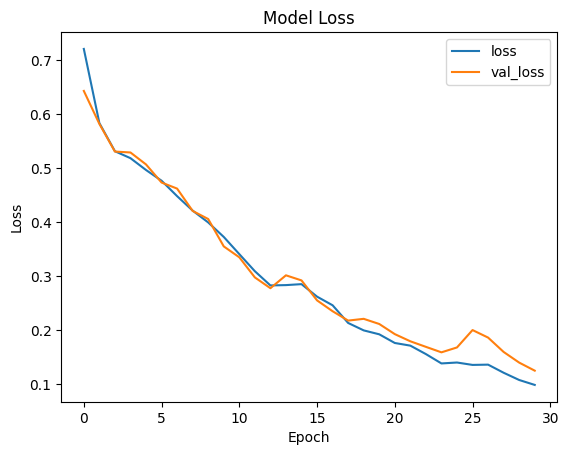

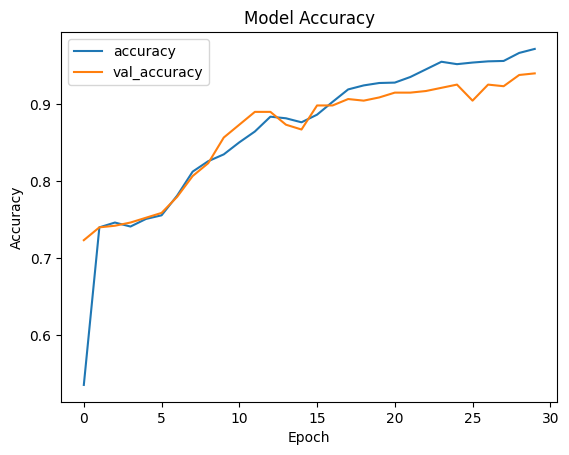

In [12]:
# Plot loss and accuracy

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


#### After the first epochs we see a regularization development with no signals of overfitting, only an increase of val_loss in the epoch 25.

### 2.4 Evaluate the model

In [13]:
# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print("The loss is: ", "{:.3f}".format(test_loss))
print("The accuracy is: ", "{:.3f}".format(test_acc))


19/19 [==============================] - 2s 110ms/step - loss: 0.1163 - accuracy: 0.9667
The loss is:  0.116
The accuracy is:  0.967


## 3. Pre-trained model: VGG16

### 3.1 Define the base

In [14]:
#Transfer learning with the pre-trained model VGG16 

#VGG16
pretrained_base_vgg16 = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base_vgg16.trainable = False


### 3.2 Design the model

In [15]:
model_vgg16= keras.Sequential([
    pretrained_base_vgg16,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15239105 (58.13 MB)
Trainable params: 524417 (2.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


### 3.3 Compile and train the model

In [16]:
#Compiling the model
model_vgg16.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],
             )

In [17]:
#Training the model
epochs=30

history = model_vgg16.fit(x_train, y_train, validation_split=0.2,
                    epochs=epochs, steps_per_epoch=5)

Epoch 1/30
5/5 [==============================] - 214s 45s/step - loss: 0.9399 - accuracy: 0.5031 - val_loss: 0.6995 - val_accuracy: 0.5167
Epoch 2/30
5/5 [==============================] - 212s 45s/step - loss: 0.5921 - accuracy: 0.6615 - val_loss: 0.5089 - val_accuracy: 0.7500
Epoch 3/30
5/5 [==============================] - 212s 44s/step - loss: 0.4729 - accuracy: 0.7750 - val_loss: 0.4231 - val_accuracy: 0.8000
Epoch 4/30
5/5 [==============================] - 212s 45s/step - loss: 0.4056 - accuracy: 0.8062 - val_loss: 0.4051 - val_accuracy: 0.8042
Epoch 5/30
5/5 [==============================] - 212s 44s/step - loss: 0.3685 - accuracy: 0.8411 - val_loss: 0.3579 - val_accuracy: 0.8521
Epoch 6/30
5/5 [==============================] - 213s 45s/step - loss: 0.3320 - accuracy: 0.8599 - val_loss: 0.3251 - val_accuracy: 0.8313
Epoch 7/30
5/5 [==============================] - 212s 44s/step - loss: 0.2999 - accuracy: 0.8745 - val_loss: 0.2883 - val_accuracy: 0.8813
Epoch 8/30
5/5 [====

### 3.4 Plot metrics

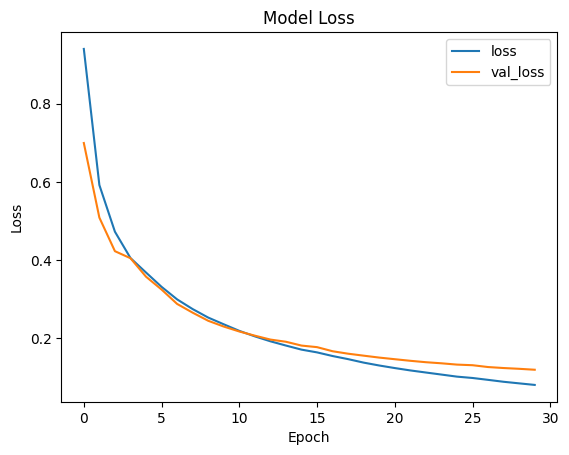

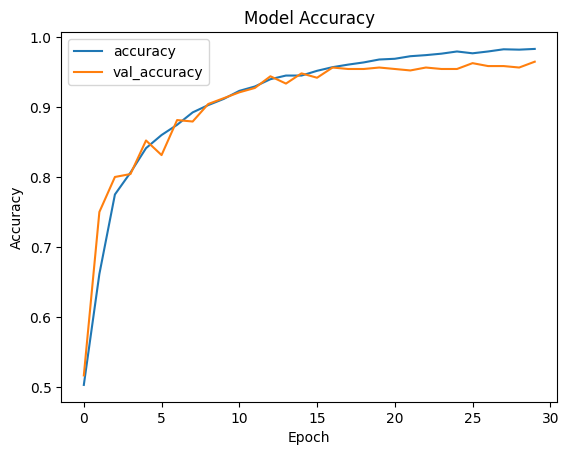

In [18]:
# Plot loss and accuracy

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


### 3.5 Evaluate the model

In [19]:
# Evaluation
test_loss, test_acc = model_vgg16.evaluate(x_test, y_test)
print("The loss is: ", "{:.3f}".format(test_loss))
print("The accuracy is: ", "{:.3f}".format(test_acc))


19/19 [==============================] - 52s 3s/step - loss: 0.1364 - accuracy: 0.9600
The loss is:  0.136
The accuracy is:  0.960


## 4. Pre-trained model: Inception V1

### 4.1 Define the base

In [20]:
#Transfer learning with the pre-trained model Inception V1

#Inception V1
pretrained_base_v1 = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/inceptionv1',
)
pretrained_base_v1.trainable = False

### 4.2 Design the model

In [22]:
model_v1= keras.Sequential([
    pretrained_base_v1,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])


### 4.3 Compile and train the model

In [23]:
#Compiling the model
model_v1.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],
             )

In [24]:
#Training the model
epochs=30

history = model_v1.fit(x_train, y_train, validation_split=0.2,
                    epochs=epochs, steps_per_epoch=5)

Epoch 1/30
5/5 [==============================] - 33s 6s/step - loss: 0.6251 - accuracy: 0.6438 - val_loss: 0.4206 - val_accuracy: 0.8313
Epoch 2/30
5/5 [==============================] - 25s 5s/step - loss: 0.4033 - accuracy: 0.8255 - val_loss: 0.3580 - val_accuracy: 0.8438
Epoch 3/30
5/5 [==============================] - 25s 5s/step - loss: 0.3279 - accuracy: 0.8615 - val_loss: 0.3246 - val_accuracy: 0.8646
Epoch 4/30
5/5 [==============================] - 25s 5s/step - loss: 0.2764 - accuracy: 0.8922 - val_loss: 0.2799 - val_accuracy: 0.8917
Epoch 5/30
5/5 [==============================] - 25s 5s/step - loss: 0.2437 - accuracy: 0.9104 - val_loss: 0.2632 - val_accuracy: 0.9042
Epoch 6/30
5/5 [==============================] - 25s 5s/step - loss: 0.2196 - accuracy: 0.9187 - val_loss: 0.2346 - val_accuracy: 0.9125
Epoch 7/30
5/5 [==============================] - 25s 5s/step - loss: 0.2014 - accuracy: 0.9344 - val_loss: 0.2207 - val_accuracy: 0.9229
Epoch 8/30
5/5 [==================

### 4.4 Plot the metrics

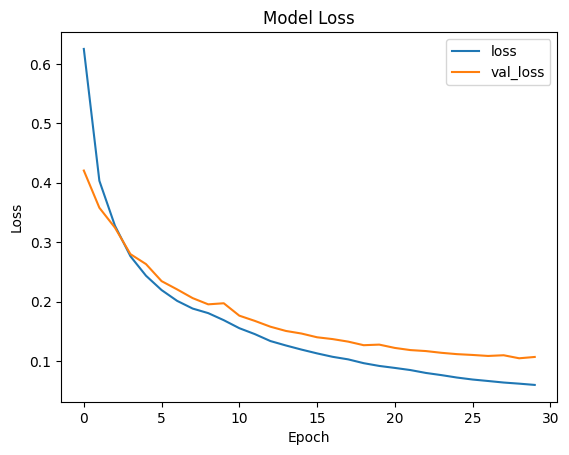

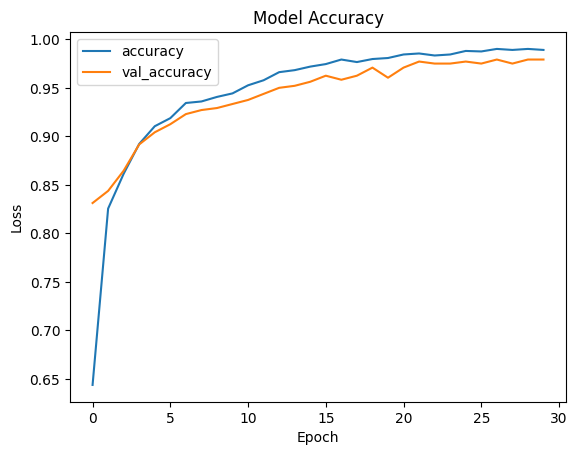

In [25]:
# Plot loss and accuracy

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### 4.5 Evaluate the model

In [26]:
# Evaluation
test_loss, test_acc = model_v1.evaluate(x_test, y_test)
print("The loss is: ", "{:.3f}".format(test_loss))
print("The accuracy is: ", "{:.3f}".format(test_acc))

19/19 [==============================] - 6s 294ms/step - loss: 0.1229 - accuracy: 0.9500
The loss is:  0.123
The accuracy is:  0.950


#### As we can see the best performance, even slightly, corresponds to our custom model, despite the resources used for both pre-trained models.

#### So, the predictions will be make with this model. In first place, we'll look for a generic prediction of a batch from our test set. Secondly, we'll select two images, one with 'yes' label and the other one with 'no' label (ground truth) in order to test the capacities of our model to make predictions on unseen images.

## 5. Predictions

In [27]:
# Make the prediction
predictions = model.predict(x_test)
predictions[:10]

19/19 [==============================] - 2s 104ms/step


array([[1.0512859e-03],
       [9.6327424e-01],
       [1.8521406e-03],
       [2.1034279e-03],
       [3.5662198e-04],
       [9.7128225e-04],
       [2.9723951e-05],
       [1.5578236e-01],
       [9.9330699e-01],
       [9.9818170e-01]], dtype=float32)

1/1 [==============================] - 0s 27ms/step
100.00% confidence the image represents a tumor


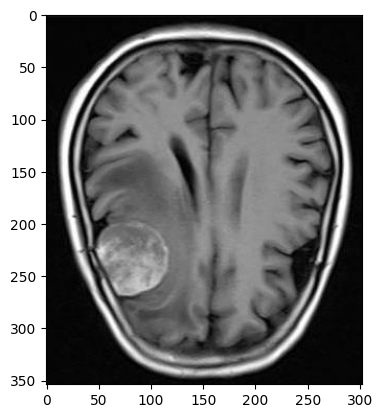

In [37]:
from matplotlib.pyplot import imshow

img = Image.open(r"../input/brain-tumor-detection/Br35H-Mask-RCNN/TEST/y703.jpg")
img_trans = np.array(img.resize((128,128)))
img_trans = img_trans.reshape(1,128,128,3)
res = model.predict(img_trans)
prob = res[0][0]*100
imshow(img)
print(str("{:5.2f}".format(prob) + 
          '% confidence the image represents a tumor'))


1/1 [==============================] - 0s 29ms/step
 0.00% confidence the image represents a tumor


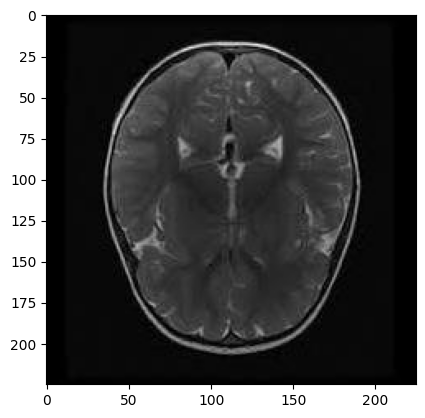

In [38]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-tumor-detection/no/no1005.jpg")
img_trans = np.array(img.resize((128,128)))
img_trans = img_trans.reshape(1,128,128,3)
res = model.predict(img_trans)
prob = res[0][0]*100
imshow(img)
print(str("{:5.2f}".format(prob) + 
          '% confidence the image represents a tumor'))


In [39]:
# Save the models

model.save("model")
model_vgg16.save("model_vgg16")
model_v1.save("model_v1")
